### Importing Libraries

In [175]:
import numpy as np
import pandas as pd
import plotly.express as px

In [176]:
# loading data
country = pd.read_csv("/content/Metadata_Country.csv")
population = pd.read_csv("/content/country_population.csv")
fertility_rate = pd.read_csv("/content/fertility_rate.csv")
life_expectancy = pd.read_csv("/content/life_expectancy.csv")

### Cleaning & Preprocessing

Country Dataframe

In [177]:
country.head()

Country Code                     Region          IncomeGroup  \
0          ABW  Latin America & Caribbean          High income   
1          AFG                 South Asia           Low income   
2          AGO         Sub-Saharan Africa  Lower middle income   
3          ALB      Europe & Central Asia  Upper middle income   
4          AND      Europe & Central Asia          High income   

                                        SpecialNotes    TableName  Unnamed: 5  
0  SNA data for 2000-2011 are updated from offici...        Aruba         NaN  
1  Fiscal year end: March 20; reporting period fo...  Afghanistan         NaN  
2                                                NaN       Angola         NaN  
3                                                NaN      Albania         NaN  
4  WB-3 code changed from ADO to AND to align wit...      Andorra         NaN

In [178]:
# keeping only necessary columns

country = country[['Country Code','Region']]

In [179]:
country.head()

Country Code                     Region
0          ABW  Latin America & Caribbean
1          AFG                 South Asia
2          AGO         Sub-Saharan Africa
3          ALB      Europe & Central Asia
4          AND      Europe & Central Asia

In [180]:
country.isna().sum()

Country Code     0
Region          46
dtype: int64

Population Dataframe


In [181]:
population.head()

Country Name Country Code     Indicator Name Indicator Code       1960  \
0        Aruba          ABW  Population, total    SP.POP.TOTL    54211.0   
1  Afghanistan          AFG  Population, total    SP.POP.TOTL  8996351.0   
2       Angola          AGO  Population, total    SP.POP.TOTL  5643182.0   
3      Albania          ALB  Population, total    SP.POP.TOTL  1608800.0   
4      Andorra          AND  Population, total    SP.POP.TOTL    13411.0   

        1961       1962       1963       1964       1965  ...        2007  \
0    55438.0    56225.0    56695.0    57032.0    57360.0  ...    101220.0   
1  9166764.0  9345868.0  9533954.0  9731361.0  9938414.0  ...  26616792.0   
2  5753024.0  5866061.0  5980417.0  6093321.0  6203299.0  ...  20997687.0   
3  1659800.0  1711319.0  1762621.0  1814135.0  1864791.0  ...   2970017.0   
4    14375.0    15370.0    16412.0    17469.0    18549.0  ...     82683.0   

         2008        2009        2010        2011        2012        2013  \
0    101353.0    101453.0    101669.0    102053.0    102577.0    103187.0   
1  27294031.0  28004331.0  28803167.0  29708599.0  30696958.0  31731688.0   
2  21759420.0  22549547.0  23369131.0  24218565.0  25096150.0  25998340.0   
3   2947314.0   2927519.0   2913021.0   2905195.0   2900401.0   2895092.0   
4     83861.0     84462.0     84449.0     83751.0     82431.0     80788.0   

         2014        2015        2016  
0    103795.0    104341.0    104822.0  
1  32758020.0  33736494.0  34656032.0  
2  26920466.0  27859305.0  28813463.0  
3   2889104.0   2880703.0   2876101.0  
4     79223.0     78014.0     77281.0  

[5 rows x 61 columns]

In [182]:
population.isna().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              4
                 ..
2012              2
2013              2
2014              2
2015              2
2016              2
Length: 61, dtype: int64

In [183]:
# keeping only necessary columns

population.drop(['Country Name','Indicator Name','Indicator Code'],axis =1,inplace=True)
population.head()

Country Code       1960       1961       1962       1963       1964  \
0          ABW    54211.0    55438.0    56225.0    56695.0    57032.0   
1          AFG  8996351.0  9166764.0  9345868.0  9533954.0  9731361.0   
2          AGO  5643182.0  5753024.0  5866061.0  5980417.0  6093321.0   
3          ALB  1608800.0  1659800.0  1711319.0  1762621.0  1814135.0   
4          AND    13411.0    14375.0    15370.0    16412.0    17469.0   

        1965        1966        1967        1968  ...        2007        2008  \
0    57360.0     57715.0     58055.0     58386.0  ...    101220.0    101353.0   
1  9938414.0  10152331.0  10372630.0  10604346.0  ...  26616792.0  27294031.0   
2  6203299.0   6309770.0   6414995.0   6523791.0  ...  20997687.0  21759420.0   
3  1864791.0   1914573.0   1965598.0   2022272.0  ...   2970017.0   2947314.0   
4    18549.0     19647.0     20758.0     21890.0  ...     82683.0     83861.0   

         2009        2010        2011        2012        2013        2014  \
0    101453.0    101669.0    102053.0    102577.0    103187.0    103795.0   
1  28004331.0  28803167.0  29708599.0  30696958.0  31731688.0  32758020.0   
2  22549547.0  23369131.0  24218565.0  25096150.0  25998340.0  26920466.0   
3   2927519.0   2913021.0   2905195.0   2900401.0   2895092.0   2889104.0   
4     84462.0     84449.0     83751.0     82431.0     80788.0     79223.0   

         2015        2016  
0    104341.0    104822.0  
1  33736494.0  34656032.0  
2  27859305.0  28813463.0  
3   2880703.0   2876101.0  
4     78014.0     77281.0  

[5 rows x 58 columns]

In [184]:
population.shape

(264, 58)

In [185]:
# removing entries with missing values

population.dropna(axis =0,inplace=True)

In [186]:
population.shape

(258, 58)

In [187]:
# making a string list of years

years = [str(i) for i in range(1960,2017)]
print(years)

['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']


In [188]:
# melting the dataframe
population = pd.melt(population,
        id_vars='Country Code',
        value_vars=years,
        var_name='Year',
        value_name='Population')

In [189]:
population.shape

(14706, 3)

In [190]:
population.head()

Country Code  Year  Population
0          ABW  1960     54211.0
1          AFG  1960   8996351.0
2          AGO  1960   5643182.0
3          ALB  1960   1608800.0
4          AND  1960     13411.0

Fertility Dataframe

In [191]:
fertility_rate.head()

Country Name Country Code                            Indicator Name  \
0        Aruba          ABW  Fertility rate, total (births per woman)   
1  Afghanistan          AFG  Fertility rate, total (births per woman)   
2       Angola          AGO  Fertility rate, total (births per woman)   
3      Albania          ALB  Fertility rate, total (births per woman)   
4      Andorra          AND  Fertility rate, total (births per woman)   

   Indicator Code   1960   1961   1962   1963   1964   1965  ...   2007  \
0  SP.DYN.TFRT.IN  4.820  4.655  4.471  4.271  4.059  3.842  ...  1.763   
1  SP.DYN.TFRT.IN  7.450  7.450  7.450  7.450  7.450  7.450  ...  6.460   
2  SP.DYN.TFRT.IN  7.478  7.524  7.563  7.592  7.611  7.619  ...  6.368   
3  SP.DYN.TFRT.IN  6.489  6.401  6.282  6.133  5.960  5.773  ...  1.668   
4  SP.DYN.TFRT.IN    NaN    NaN    NaN    NaN    NaN    NaN  ...  1.180   

    2008   2009   2010   2011   2012   2013   2014   2015   2016  
0  1.764  1.769  1.776  1.783  1.791  1.796  1.800  1.801  1.800  
1  6.254  6.038  5.816  5.595  5.380  5.174  4.981  4.802  4.635  
2  6.307  6.238  6.162  6.082  6.000  5.920  5.841  5.766  5.694  
3  1.650  1.646  1.653  1.668  1.685  1.700  1.710  1.714  1.713  
4  1.250  1.190  1.270    NaN    NaN    NaN    NaN    NaN    NaN  

[5 rows x 61 columns]

In [192]:
# keeping only necessary columns

fertility_rate.drop(['Country Name', 'Indicator Name', 'Indicator Code'], axis=1, inplace=True)

In [193]:
# removing entries with missing values

fertility_rate.dropna(axis =0,inplace=True)

In [194]:
# melting the dataframe

fertility_rate = pd.melt(fertility_rate,
        id_vars='Country Code',
        value_vars=years,
        var_name='Year',
        value_name='Fertility Rate')

In [195]:
fertility_rate.head()

Country Code  Year  Fertility Rate
0          ABW  1960        4.820000
1          AFG  1960        7.450000
2          AGO  1960        7.478000
3          ALB  1960        6.489000
4          ARB  1960        6.948747

Life Expectancy Dataframe

In [196]:
life_expectancy.head()

Country Name Country Code                           Indicator Name  \
0        Aruba          ABW  Life expectancy at birth, total (years)   
1  Afghanistan          AFG  Life expectancy at birth, total (years)   
2       Angola          AGO  Life expectancy at birth, total (years)   
3      Albania          ALB  Life expectancy at birth, total (years)   
4      Andorra          AND  Life expectancy at birth, total (years)   

   Indicator Code    1960    1961    1962    1963    1964    1965  ...  \
0  SP.DYN.LE00.IN  65.662  66.074  66.444  66.787  67.113  67.435  ...   
1  SP.DYN.LE00.IN  32.292  32.742  33.185  33.624  34.060  34.495  ...   
2  SP.DYN.LE00.IN  33.251  33.573  33.914  34.272  34.645  35.031  ...   
3  SP.DYN.LE00.IN  62.279  63.298  64.187  64.911  65.461  65.848  ...   
4  SP.DYN.LE00.IN     NaN     NaN     NaN     NaN     NaN     NaN  ...   

     2007    2008    2009    2010    2011    2012    2013    2014    2015  \
0  74.576  74.725  74.872  75.016  75.158  75.299  75.440  75.582  75.725   
1  59.694  60.243  60.754  61.226  61.666  62.086  62.494  62.895  63.288   
2  55.096  56.189  57.231  58.192  59.042  59.770  60.373  60.858  61.241   
3  75.656  75.943  76.281  76.652  77.031  77.389  77.702  77.963  78.174   
4     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

     2016  
0  75.867  
1  63.673  
2  61.547  
3  78.345  
4     NaN  

[5 rows x 61 columns]

In [197]:
# keeping only necessary columns

life_expectancy.drop(['Country Name', 'Indicator Name', 'Indicator Code'], axis=1, inplace=True)

In [198]:
# removing entries with missing values

life_expectancy.dropna(axis =0,inplace=True)

In [199]:
# melting the dataframe

life_expectancy = pd.melt(life_expectancy,
        id_vars='Country Code',
        value_vars=years,
        var_name='Year',
        value_name='Life Expectancy')

In [200]:
life_expectancy.head()

Country Code  Year  Life Expectancy
0          ABW  1960        65.662000
1          AFG  1960        32.292000
2          AGO  1960        33.251000
3          ALB  1960        62.279000
4          ARB  1960        46.825065

### Merging all dataframes into one

In [201]:
# Merge the data into one dataframe
df = pd.merge(country, population, how='left', on='Country Code')
df = pd.merge(df, life_expectancy, how='left', on=['Country Code', 'Year'])
df = pd.merge(df, fertility_rate, how='left', on=['Country Code', 'Year'])

# Remove remaining lines with missing values
# They will appear if a country is in one dataset but not in another one
df.dropna(axis=0, inplace=True)

In [202]:
df.head()

Country Code                     Region  Year  Population  Life Expectancy  \
0          ABW  Latin America & Caribbean  1960     54211.0           65.662   
1          ABW  Latin America & Caribbean  1961     55438.0           66.074   
2          ABW  Latin America & Caribbean  1962     56225.0           66.444   
3          ABW  Latin America & Caribbean  1963     56695.0           66.787   
4          ABW  Latin America & Caribbean  1964     57032.0           67.113   

   Fertility Rate  
0           4.820  
1           4.655  
2           4.471  
3           4.271  
4           4.059

### Plotting the animation graph of Life Expectancy vs Fertility Rate

In [203]:
px.scatter(df,
           x="Fertility Rate",
           y="Life Expectancy",
           animation_frame="Year",
           animation_group="Country Code",
           size="Population",
           color="Region",
           template="plotly_dark",
           hover_name="Country Code",
           log_x=True,
           size_max=55,
           range_x=[1,10],
           range_y=[10,100])

### Other Basic Visualizations:

In [204]:
# Population Trends ( BAR CHART )

px.bar(df,
           x="Region",
           y="Population",
           animation_frame="Year",
           animation_group="Country Code",
           color="Region",
           template="plotly_dark",
           range_y=[0,2500000000])

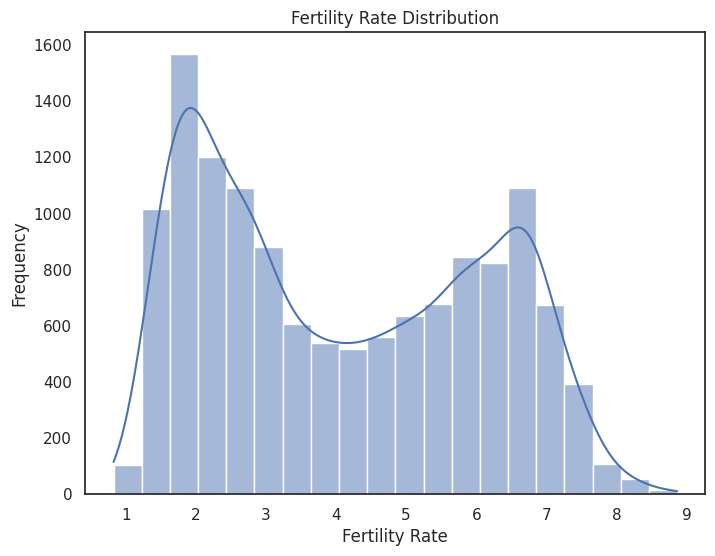

In [210]:
# Fertility Rate DIstribution

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(fertility_rate['Fertility Rate'], bins=20, kde=True)
plt.title('Fertility Rate Distribution')
plt.xlabel('Fertility Rate')
plt.ylabel('Frequency')
plt.show()


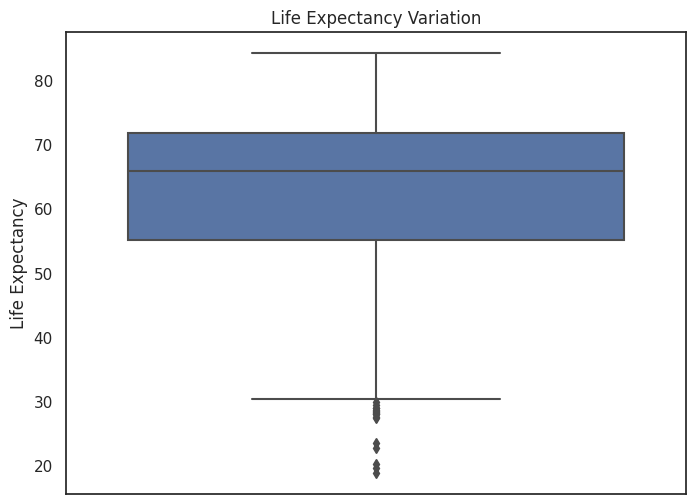

In [211]:
# Life Expectancy Variation

plt.figure(figsize=(8, 6))
sns.boxplot(y=life_expectancy['Life Expectancy'])
plt.title('Life Expectancy Variation')
plt.ylabel('Life Expectancy')
plt.show()

<ipython-input-207-a99343df38fd>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



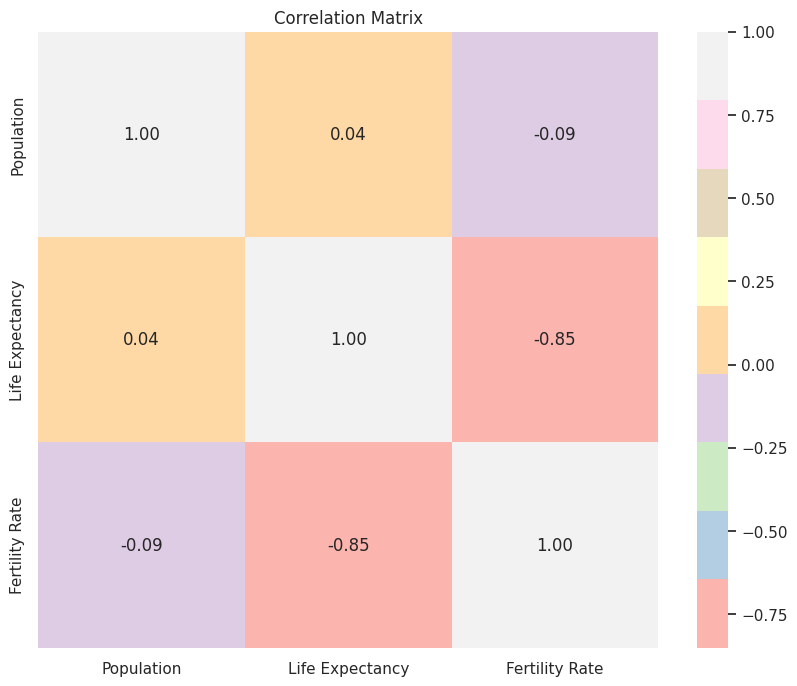

In [207]:
# Correlation Analysis

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Pastel1', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

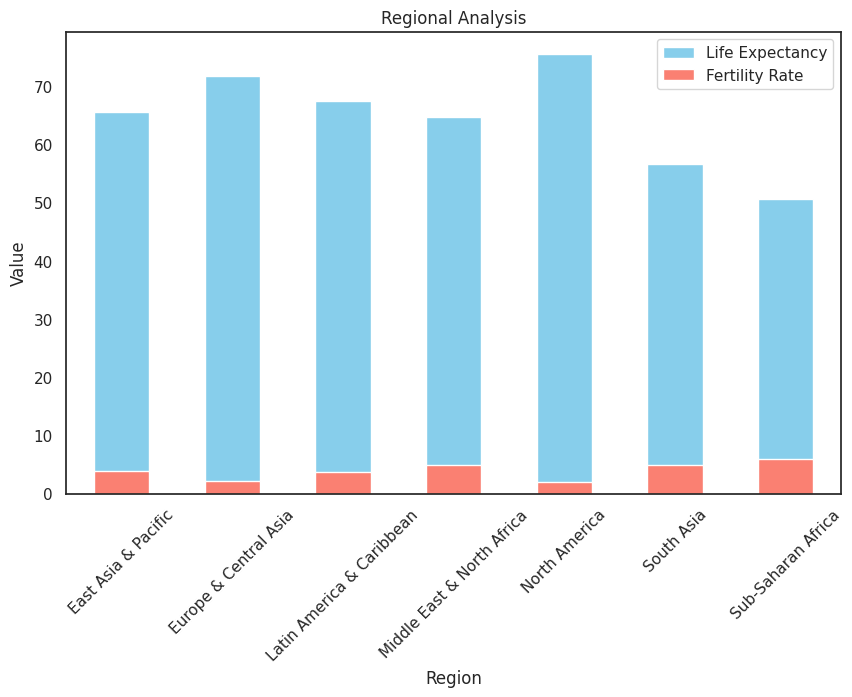

In [212]:
# Regional Analysis

region_mean_life_expectancy = df.groupby('Region')['Life Expectancy'].mean()
region_mean_fertility_rate = df.groupby('Region')['Fertility Rate'].mean()

# Visualize regional analysis
plt.figure(figsize=(10, 6))
region_mean_life_expectancy.plot(kind='bar', color='skyblue', label='Life Expectancy')
region_mean_fertility_rate.plot(kind='bar', color='salmon', label='Fertility Rate')
plt.title('Regional Analysis')
plt.xlabel('Region')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.show()